# Exploratory Data Analysis and Cleaning

The raw data file will be loaded and interogated obtain preliminary insights and identify and erroneous date for update or removal.

In [41]:
#Libraries
#Dataframe and arrays
import pandas as pd
import numpy as np

#Graphing/ Charting/ Visualisations
import matplotlib as plt

In [2]:
df = pd.read_excel('../data/online_fashion.xlsx')

In [34]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Rev                   float64
Return                  int64
dtype: object

In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.shape

(541909, 8)

In [36]:
df['Day'] = df['InvoiceDate'].dt.day_name()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev,Return,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,Wednesday


In [43]:
df.Day.value_counts()

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: Day, dtype: int64

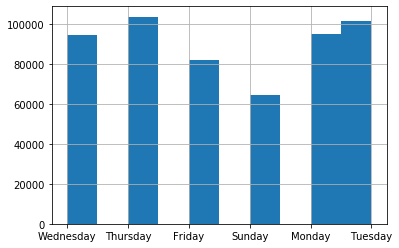

In [42]:
df.Day.hist()

In [19]:
df['Rev'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [23]:
def transtype(row): 
    """
    Input:
    Output:
    
    The purpose of this function is to .....
    """
    if row['Quantity'] < 0 : 
        return 1
    else: 
        return 0

df['Return'] = df.apply(transtype, axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev,Return
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0


In [25]:
df.loc[(df['Return'] == 1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev,Return
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,1


In [29]:
df.loc[((df['UnitPrice'] == 0) & (df['Quantity'] > 0) )] #1,179  rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev,Return
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0,0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0,0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0,0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0,0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0,0
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0,0
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0,0
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0,0
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom,0.0,0
4348,536765,84952C,NaN,19,2010-12-02 14:43:00,0.0,NaN,United Kingdom,0.0,0


In [ ]:
#need to learn more about transactions with no customer ID before I decice to simply drop them
# there are 135,080 rows out of 541,909
# there are 1,719 rows of Nan customer and Qty 0 or a return (across 1,518 unique invoices)

#df.dropna(subset=['CustomerID'], inplace=True)

In [15]:
df[np.isnan(df.CustomerID)].loc[(df['Quantity'] == 0)] #nil
 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [17]:
# 1719 rows
df[np.isnan(df.CustomerID)].loc[(df['Quantity'] < 0)]#.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7192,537000,21414,NaN,-22,2010-12-03 15:32:00,0.00,NaN,United Kingdom
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.00,NaN,United Kingdom
7195,537003,85126,NaN,-2,2010-12-03 15:33:00,0.00,NaN,United Kingdom
7196,537004,21814,NaN,-30,2010-12-03 15:34:00,0.00,NaN,United Kingdom
7197,537005,21692,NaN,-70,2010-12-03 15:35:00,0.00,NaN,United Kingdom


In [18]:
df[np.isnan(df.CustomerID)].loc[(df['Quantity'] < 0)].loc[(df['UnitPrice'] > 0)] # rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11502,C537251,22429,ENAMEL MEASURING JUG CREAM,-2,2010-12-06 10:45:00,4.25,NaN,United Kingdom
11503,C537251,22620,4 TRADITIONAL SPINNING TOPS,-8,2010-12-06 10:45:00,1.25,NaN,United Kingdom
11504,C537251,21890,S/6 WOODEN SKITTLES IN COTTON BAG,-2,2010-12-06 10:45:00,2.95,NaN,United Kingdom
11505,C537251,22564,ALPHABET STENCIL CRAFT,-5,2010-12-06 10:45:00,1.25,NaN,United Kingdom
11506,C537251,21891,TRADITIONAL WOODEN SKIPPING ROPE,-3,2010-12-06 10:45:00,1.25,NaN,United Kingdom
11507,C537251,22747,POPPY'S PLAYHOUSE BATHROOM,-6,2010-12-06 10:45:00,2.10,NaN,United Kingdom
11508,C537251,22454,MEASURING TAPE BABUSHKA RED,-8,2010-12-06 10:45:00,2.95,NaN,United Kingdom
11509,C537251,22327,ROUND SNACK BOXES SET OF 4 SKULLS,-4,2010-12-06 10:45:00,2.95,NaN,United Kingdom
11510,C537251,21915,RED HARMONICA IN BOX,-4,2010-12-06 10:45:00,1.25,NaN,United Kingdom
11511,C537251,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9,2010-12-06 10:45:00,2.55,NaN,United Kingdom


In [13]:
len(df[np.isnan(df.CustomerID)].loc[(df['Quantity'] <= 0)].InvoiceNo.unique()) #1518

1518

In [4]:
df.shape

(541909, 8)

In [28]:
df.sort_values(by='Quantity').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev,Return
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6,1
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,1
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,-0.0,1
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom,-0.0,1
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8,1


In [27]:
df.isnull().sum() / df.shape[0] * 100.00

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
Rev             0.000000
Return          0.000000
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [10]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

## Decide what I want to drop

In [11]:
#Country = Unspecified 
#CustomerID
#Description

#####Price
#Unit price of 0 (zero)

#####Quantity
#Massive negative values

#####Items
#POSTAGE
#DOTCOM POSTAGE

In [23]:
#customers with more than one country
df_cust_country = df.groupby(['CustomerID','Country']).count()
#df_cust_country.to_frame
df_cust_country

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Rev,Weekday
CustomerID,Country,,,,,,,,
12346.0,United Kingdom,2,2,2,2,2,2,2,2
12347.0,Iceland,182,182,182,182,182,182,182,182
12348.0,Finland,31,31,31,31,31,31,31,31
12349.0,Italy,73,73,73,73,73,73,73,73
12350.0,Norway,17,17,17,17,17,17,17,17
12352.0,Norway,95,95,95,95,95,95,95,95
12353.0,Bahrain,4,4,4,4,4,4,4,4
12354.0,Spain,58,58,58,58,58,58,58,58
12355.0,Bahrain,13,13,13,13,13,13,13,13


In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday


In [26]:
#Customers with Negative Qty
#Identify Customer/ Product mix that are negative - i.e. potential returns from outside reporting period

df_cust_neg_qty = df.groupby(['CustomerID', 'StockCode'])['Quantity'].agg('sum').to_frame()
df_cust_neg_qty.reset_index(inplace=True)
df_cust_neg_qty = df_cust_neg_qty.loc[(df_cust_neg_qty['Quantity'] <= 0)]
df_cust_neg_qty

df_new = df[~(df['StockCode'].isin(df_cust_neg_qty.StockCode) & df['CustomerID'].isin(df_cust_neg_qty.CustomerID))]

df_new.shape

(434567, 10)

In [27]:
#Find & Remove Strange StockCodes
df_unique_stock_codes = df['StockCode'].unique()
df_unique_stock_codes = pd.DataFrame(df_unique_stock_codes)
df_unique_stock_codes['len'] = df_unique_stock_codes[0].astype(str).str.len()
df_unique_stock_codes.rename(columns={0:'StockCode'}, inplace=True)
df_unique_stock_codes.sort_values(by='len')
df_unique_stock_codes['len'] = df_unique_stock_codes['len'].astype(int)
#df_unique_stock_codes.loc[(df_unique_stock_codes['len'] >= 8) | (df_unique_stock_codes['len'] <= 4)].sort_values(by='len')

df_stock_to_drop_stg = df_unique_stock_codes.loc[(df_unique_stock_codes['len'] >= 8) | (df_unique_stock_codes['len'] <= 4)].sort_values(by='len')
df_stock_to_drop_stg.reset_index(drop=True)
df_stock_to_drop = pd.concat([df_stock_to_drop_stg.iloc[0:10], df_stock_to_drop_stg.iloc[-6:], df_stock_to_drop_stg.iloc[-9:-8] ])
df_stock_to_drop

df_new = df_new[~(df['StockCode'].isin(df_stock_to_drop.StockCode) )]

df_new.shape


C:\Users\ellio\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(432457, 10)

In [28]:
#Remove rows where the CustomerID is Nan
df_new.dropna(subset=['CustomerID'], inplace=True)


In [29]:
#Stratisfying Customers based on Spend During Reporting Period

# PART 1
rev_by_cust = df_new.groupby("CustomerID")["Rev"].sum().to_frame()
rev_by_cust

rev_by_cust['quantile'] = pd.qcut(rev_by_cust['Rev'], 100, labels=False)
rev_by_cust

# Emanuele's way didnt work. 
conditions = [
    (rev_by_cust['quantile'] >= 75 ) & (rev_by_cust['quantile'] <= 95),
    (rev_by_cust['quantile'] > 95)]
choices = ['Preferred', 'VIP']
rev_by_cust['Status'] = np.select(conditions, choices, default='Regular')
print(rev_by_cust)


                Rev  quantile     Status
CustomerID                              
12347.0     4310.00        95  Preferred
12348.0     1437.24        79  Preferred
12349.0     1457.55        79  Preferred
12350.0      294.40        28    Regular
12352.0      245.13        24    Regular
12353.0       89.00         4    Regular
12354.0     1079.40        72    Regular
12355.0      459.40        45    Regular
12356.0     2487.43        89  Preferred
12357.0     6207.67        97        VIP
12358.0      928.06        67    Regular
12359.0     1446.13        79  Preferred
12360.0     2302.06        88  Preferred
12361.0      174.90        15    Regular
12362.0     1679.43        82  Preferred
12363.0      552.00        50    Regular
12364.0     1208.10        75  Preferred
12365.0      140.34        11    Regular
12367.0      150.90        12    Regular
12370.0     3425.69        93  Preferred
12371.0     1527.96        80  Preferred
12372.0     1196.04        74    Regular
12373.0      324

In [35]:
#Find Strange Descriptions
df_unique_descriptions = df['Description'].unique()
df_unique_descriptions = pd.DataFrame(df_unique_descriptions)
df_unique_descriptions['len'] = df_unique_descriptions[0].astype(str).str.len()
df_unique_descriptions.rename(columns={0:'Description'}, inplace=True)
df_unique_descriptions.sort_values(by='len')
df_unique_descriptions['len'] = df_unique_descriptions['len'].astype(int)
df_unique_descriptions.loc[(df_unique_descriptions['len'] >= 36) | (df_unique_descriptions['len'] <= 11)].sort_values(by='len', ascending=False)

#put into consistent case i.e. upper or lower

,Description,len
1615,FROG CANDLE,11
3998,michel oops,11
4139,damages wax,11
2975,thrown away,11
3779,CORDIAL JUG,11
3292,wrong code?,11
4193,????missing,11
4013,stock check,11
1631,SKULLS TAPE,11
4177,dotcomstock,11


In [36]:
#Find descriptions with negative works like 'damaged' 'fees' 'mouldy', 'faulty', 'wet', 'lost', 'missing','wrong', 'broke'

In [39]:
len(df['StockCode'].unique())

4070

In [40]:
len(df['CustomerID'].unique())

4373

In [41]:
#Finding Customers with more than 1 Country listed
df_customer_stg = df.groupby('CustomerID')['Country'].unique()
df_customer_stg.loc[df_customer_stg.apply(lambda x:len(x)>1)]

CustomerID
12370.0           [Cyprus, Austria]
12394.0          [Belgium, Denmark]
12417.0            [Belgium, Spain]
12422.0    [Australia, Switzerland]
12429.0          [Denmark, Austria]
12431.0        [Australia, Belgium]
12455.0             [Cyprus, Spain]
12457.0       [Switzerland, Cyprus]
Name: Country, dtype: object

In [42]:
pd.DataFrame(df_customer_stg)

,Country
CustomerID,
12346.0,[United Kingdom]
12347.0,[Iceland]
12348.0,[Finland]
12349.0,[Italy]
12350.0,[Norway]
12352.0,[Norway]
12353.0,[Bahrain]
12354.0,[Spain]
12355.0,[Bahrain]


In [43]:
#Finding StockCodes with  more than 1 Description listed
# NOTE THAT I USED THE NEW DATAFRAME HERE
df_inventory_stg = df_new.groupby('StockCode')['Description'].unique()
df_inventory_stg.loc[df_inventory_stg.apply(lambda x:len(x)>1)]

#greater than 1 = 191
#greater than 2 = 16
#greater than 3 = 2

StockCode
20622             [VIPPASSPORT COVER , VIP PASSPORT COVER ]
21109     [LARGE CAKE TOWEL, CHOCOLATE SPOTS, LARGE CAKE...
21112     [SWISS ROLL TOWEL, PINK  SPOTS, SWISS ROLL TOW...
21175     [GIN + TONIC DIET METAL SIGN, GIN AND TONIC DI...
21232     [STRAWBERRY CERAMIC TRINKET BOX, STRAWBERRY CE...
21243         [PINK  POLKADOT PLATE , PINK POLKADOT PLATE ]
21507     [ELEPHANT, BIRTHDAY CARD, , ELEPHANT BIRTHDAY ...
21811     [CHRISTMAS HANGING HEART WITH BELL, HANGING HE...
21818     [GLITTER CHRISTMAS HEART , GLITTER HEART DECOR...
21899             [KEY FOB , GARAGE DESIGN, GARAGE KEY FOB]
21928     [JUMBO BAG SCANDINAVIAN PAISLEY, JUMBO BAG SCA...
22129     [PARTY CONES CANDY TREE DECORATION, PARTY CONE...
22134     [LADLE LOVE HEART RED , MINI LADLE LOVE HEART ...
22135     [LADLE LOVE HEART PINK, MINI LADLE LOVE HEART ...
22179     [SET 10 LIGHTS NIGHT OWL, SET 10 NIGHT OWL LIG...
22197                [SMALL POPCORN HOLDER, POPCORN HOLDER]
22268     [EASTER DECORATION S

In [44]:
#df_new['UnitPrice'].loc[(df_new['StockCode'] == 22776)].unique()
df_new.loc[(df_new['StockCode'] == 23126)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev,Weekday
107430,545445,23126,DOLLCRAFT GIRL AMELIE KIT,4,2011-03-02 16:26:00,4.95,17738.0,United Kingdom,19.80,Wednesday
113147,545914,23126,DOLLCRAFT GIRL AMELIE KIT,4,2011-03-08 11:39:00,4.95,13340.0,United Kingdom,19.80,Tuesday
113794,545998,23126,FELTCRAFT GIRL AMELIE KIT,4,2011-03-08 14:35:00,4.95,13373.0,United Kingdom,19.80,Tuesday
113900,546000,23126,DOLLCRAFT GIRL AMELIE,4,2011-03-08 14:47:00,4.95,13089.0,United Kingdom,19.80,Tuesday
114675,546037,23126,FELTCRAFT GIRL AMELIE KIT,4,2011-03-09 10:00:00,4.95,14825.0,United Kingdom,19.80,Wednesday
115437,546120,23126,DOLLCRAFT GIRL AMELIE,4,2011-03-09 14:23:00,4.95,16945.0,United Kingdom,19.80,Wednesday
115551,546133,23126,DOLLCRAFT GIRL AMELIE KIT,4,2011-03-09 15:20:00,4.95,14291.0,United Kingdom,19.80,Wednesday
119745,546569,23126,FELTCRAFT GIRL AMELIE KIT,4,2011-03-15 10:53:00,4.95,14016.0,EIRE,19.80,Tuesday
126340,547071,23126,FELTCRAFT GIRL AMELIE KIT,4,2011-03-20 13:59:00,4.95,12693.0,Germany,19.80,Sunday
130312,547485,23126,FELTCRAFT GIRL AMELIE KIT,2,2011-03-23 11:16:00,4.95,17019.0,United Kingdom,9.90,Wednesday


In [45]:
#df_new['CustomerID'].isna().sum()

In [46]:
#df_new.dropna(subset=['CustomerID'],inplace=True)


In [49]:
#Find Min, Max, Mean of StockCodes
df_item_prices = df[['StockCode', 'UnitPrice']]
df_item_prices.groupby(by='StockCode').agg([min, max, 'mean'])

UnitPrice                       
                   min        max        mean
StockCode                                    
10002             0.00      1.660    1.056849
10080             0.00      0.850    0.376667
10120             0.21      0.210    0.210000
10125             0.42      1.660    0.859681
10133             0.00      1.660    0.645800
10134             0.00      0.000    0.000000
10135             0.25      2.510    1.410167
11001             0.83      3.360    1.878167
15030             0.00      0.290    0.269286
15034             0.07      0.850    0.366408
15036             0.00      1.630    1.063416
15039             0.53      1.660    1.231745
16008             0.00      0.250    0.134225
16010             0.00      0.120    0.090000
16011             0.21      0.210    0.210000
16012             0.21      0.210    0.210000
16014             0.32      0.420    0.401481
16015             0.00      0.500    0.434074
16016             0.72      0.850    0.846000
16033             0.00      0.120    0.096000
16043             0.00      0.120    0.080000
16045             0.00      0.120    0.042254
16046             0.00      0.850    0.802778
16048             0.12      0.850    0.325072
16049             0.00      0.420    0.171429
16052             0.00      0.840    0.547143
16053             0.00      0.000    0.000000
16054             0.12      0.420    0.128824
16216             0.06      1.250    0.152444
16218             0.06      2.130    0.269844
...                ...        ...         ...
C2                0.00    150.000   49.291667
CRUK              1.60   1100.440  495.839375
D                 0.01   1867.860   72.484545
DCGS0003          0.00      2.510    1.988000
DCGS0004         16.63     16.630   16.630000
DCGS0055          0.00      0.000    0.000000
DCGS0057          0.00      0.000    0.000000
DCGS0066P         0.00      0.000    0.000000
DCGS0067          0.00      0.000    0.000000
DCGS0068          0.00      0.000    0.000000
DCGS0069          0.00     15.790    7.895000
DCGS0070          0.00     12.720    6.360000
DCGS0071          0.00      0.000    0.000000
DCGS0072          0.00      0.000    0.000000
DCGS0073          0.00      0.000    0.000000
DCGS0074          0.00      0.000    0.000000
DCGS0076         16.13     16.130   16.130000
DCGSSBOY          1.25      3.290    3.104545
DCGSSGIRL         1.25      3.290    3.133077
DOT               0.00   4505.170  290.495859
M                 0.00  38970.000  375.566392
PADS              0.00      0.001    0.000750
POST              0.00   8142.750   36.933495
S                 2.80    570.000   50.404603
gift_0001_10      0.00      8.330    7.404444
gift_0001_20      0.00     17.020   15.038000
gift_0001_30      0.00     25.530   21.941250
gift_0001_40     33.33     34.040   33.566667
gift_0001_50     41.67     42.550   41.890000
m                 2.55      2.550    2.550000

[4070 rows x 3 columns]

In [50]:
df_new.to_csv('../data/cleaned_df2.csv')

In [ ]:
#data for recommender system - remove those 
#1. who returned items purchased outside of reporting period i.e. net negative value
#2. do not have a Customer ID
# dfXXXX.to_csv('../data/data_for_recommender.csv')

In [ ]:
#data for returns analysis - remove those 
#1. anything that isn't Return = 0
# dfXXXX.to_csv('../data/data_for_returns_analysis.csv')

def tagforremoval_negqty(row):
    '''
    Input: Row (which will be slicked into columns)
    Output: 1 or 0 depening on if row is to be deleted
    
    The purpose of this function is to tag rows for deletion.
    '''
    if row['CustomerID'].isin(df_cust_neg_qty.CustomerID) & row['StockCode'].isin(df_cust_neg_qty.StockCode):
        return 1
    else:
        return 0
